In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("drive/My Drive/Applied ML/AML Group Project/data")
!pwd

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Applied ML/AML Group Project/data


# Load Data

In [ ]:
target = "target_status_binary"

In [ ]:
#import the dataset
credit_overdue_processed_smote_dev = pd.read_csv('credit_overdue_processed_smote_dev.csv')
credit_overdue_processed_smote_test = pd.read_csv('credit_overdue_processed_smote_test.csv')

In [ ]:
def map_bool_to_int(df, col_name):
    df[col_name] = df[col_name].map({1: 'True', 0: 'False'})
    return df

credit_overdue_processed_smote_dev = map_bool_to_int(credit_overdue_processed_smote_dev, target)
credit_overdue_processed_smote_test = map_bool_to_int(credit_overdue_processed_smote_test, target)

In [ ]:
credit_overdue_processed_smote_dev

,Unnamed: 0,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,unemployed,CODE_GENDER_F,CODE_GENDER_M,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,occupation_category_0,occupation_category_1,occupation_category_2,occupation_category_3,occupation_category_4,occupation_category_5,occupation_category_6,occupation_category_7,occupation_category_8,target_status_binary
0,0,5.126174e+06,0.00000,27000.000000,-14869.000000,-5067.000000,1.0,1.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,True,False,False,False,False,True
1,1,5.117643e+06,1.00000,135000.000000,-11101.000000,-96.000000,1.0,1.00000,0.00000,0.00000,3.00000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,False
2,2,5.113723e+06,0.00000,90000.000000,-19551.000000,-1927.000000,1.0,0.00000,1.00000,1.00000,2.00000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,False
3,3,5.091170e+06,0.00000,81000.000000,-9796.000000,-292.000000,1.0,1.00000,0.00000,0.00000,1.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.00000,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,True,False,False,False,False,False,False,False,False,False
4,4,5.044667e+06,0.00000,76500.000000,-22302.000000,0.000000,1.0,0.00000,0.00000,0.00000,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49347,49347,5.024389e+06,0.00000,117000.000000,-13494.000000,-1281.000000,1.0,0.00000,0.00000,0.00000,2.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,1.00000,0.0,0.000000,0.0,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000,False,True,False,False,False,False,False,False,False,True
49348,49348,5.023287e+06,0.00000,153873.589613,-22281.437370,-210.826293,1.0,0.00000,0.00000,0.00000,2.00000,0.805869,0.805869,0.194131,1.000000,0.000000,0.805869,0.194131,0.194131,0.805869,0.0,0.0,0.00000,0.0,0.194131,0.0,0.805869,0.000000,0.194131,0.805869,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.000000,False,False,True,False,False,False,False,False,True,True
49349,49349,5.024022e+06,1.69826,315000.000000,-12122.000699,-1478.087007,1.0,0.00000,0.69826,0.00000,3.69826,0.000000,0.000000,1.000000

In [ ]:
features = list(credit_overdue_processed_smote_dev.iloc[:,2:-1].columns)
features

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'FLAG_MOBIL',
 'FLAG_WORK_PHONE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'unemployed',
 'CODE_GENDER_F',
 'CODE_GENDER_M',
 'FLAG_OWN_CAR_N',
 'FLAG_OWN_CAR_Y',
 'FLAG_OWN_REALTY_N',
 'FLAG_OWN_REALTY_Y',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary special',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartm

In [ ]:
X_dev = credit_overdue_processed_smote_dev.iloc[:,2:-1]
y_dev = credit_overdue_processed_smote_dev['target_status_binary']

In [ ]:
X_test = credit_overdue_processed_smote_test.iloc[:,2:-1]
y_test = credit_overdue_processed_smote_test['target_status_binary']

In [ ]:
X_dev.shape, y_dev.shape, X_test.shape, y_test.shape

((49352, 46), (49352,), (6986, 46), (6986,))

# AutoML

[H2O.ai](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 5.0 MB/s eta 0:00:00


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

# Convert the pandas DataFrame to an H2OFrame
hf = h2o.H2OFrame(credit_overdue_processed_smote_dev)

# Specify the feature names and target variable name
x = features
y = "target_status_binary"

# # Convert the response column to a factor (H2O requires the response to be categorical for classification)
hf[y] = hf[y].asfactor()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpfm9ccvpn
  JVM stdout: /tmp/tmpfm9ccvpn/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpfm9ccvpn/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,06 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_65qnnz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
# Initialize and train the AutoML model
# Here, you can specify max_runtime_secs according to your preference or max_models to limit the number of models
aml = H2OAutoML(max_runtime_secs=180,
                nfolds=5,
                seed=1,
                stopping_metric='AUTO',
                sort_metric = "AUC",
                project_name="automl_credit_card_approval")
%time aml.train(x=x, y=y, training_frame=hf)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))  # Print all rows instead of default (10 rows)

AutoML progress: |
00:06:15.395: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

██████████████████
00:07:07.163: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

████████████████████
00:08:03.7: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

████████████████
00:08:50.205: _train param, Dropping unused columns: [FLAG_MOBIL]

██
00:08:55.189: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

██
00:09:01.697: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

█
00:09:06.486: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

█
00:09:09.286: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

█
00:09:11.924: _train param, Dropping bad and constant columns: [FLAG_MOBIL]

██| (done) 100%

00:09:15.186: _train param, Dropping unused columns: [FLAG_MOBIL]

CPU times: user 2.77 s, sys: 276 ms, total: 3.05 s
Wall time: 3min 5s
model_id                                                     auc    logloss  

In [ ]:
# Get the best model
best_model = aml.leader

# Convert the pandas DataFrame to an H2OFrame
val_hf = h2o.H2OFrame(X_test)

# Predict on the validation set
val_preds = best_model.predict(val_hf)

# Convert predictions and true labels to pandas DataFrame for evaluation with sklearn
predctions_df = val_preds.as_data_frame()
y_pred = predctions_df.values[:,0].astype(int)
y_true = y_test.apply(lambda x: 1 if x == "True" else 0).values

from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_true)
print("ACCURACY: ", acc)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%
ACCURACY:  0.8660177497852849


/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


## best model

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      6169
           1       0.41      0.31      0.35       817

    accuracy                           0.87      6986
   macro avg       0.66      0.63      0.64      6986
weighted avg       0.85      0.87      0.86      6986

Accuracy: 0.8660177497852849
Precision: 0.4060031595576619
Recall: 0.31456548347613217
F1 Score: 0.3544827586206896


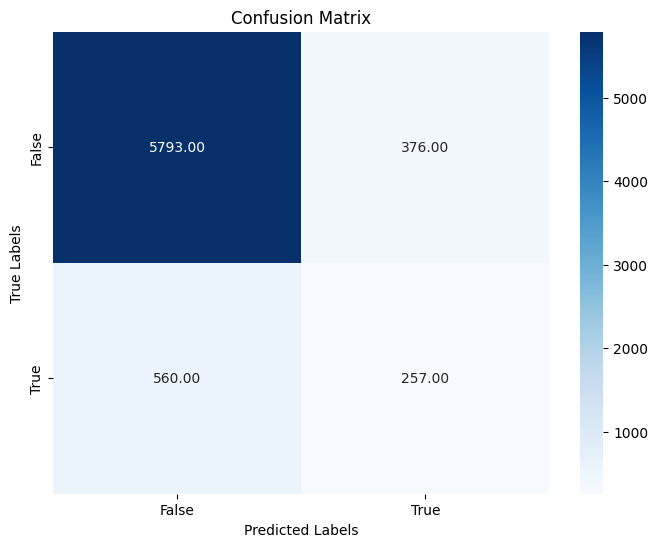

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

cm = confusion_matrix(y_true, y_pred)

report = classification_report(y_true, y_pred)

# Print the classification report
print(report)

# Print accuracy, precision, recall, and F1 score
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(f'Precision: {precision_score(y_true, y_pred)}')
print(f'Recall: {recall_score(y_true, y_pred)}')
print(f'F1 Score: {f1_score(y_true, y_pred)}')


fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='.2f')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.show()